In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [145]:
rh = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

In [146]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [147]:
rh.drop(["EmployeeCount", "Over18"], axis=1, inplace=True)

In [148]:
rh["Attrition"] = rh["Attrition"].replace(["Yes", "No"], [1, 0])
rh["BusinessTravel"] = rh["BusinessTravel"].replace(["Travel_Rarely", "Travel_Frequently",
                                                     "Non-Travel "], ["Raramente", "Sempre", "Nunca"])
rh["Department"] = rh["Department"].replace(["Research & Development", "Sales", "Human Resources"], ["Pesquisa_Desenv", 
                                                                                                    "Vendas", "Recursos_humanos"])
rh["Education"] = rh["Education"].replace([1,2,3,4,5], ["Ensino_medio", "Faculdade", "Pos_graduado", "Mestrado", "Doutorado"])
rh["EducationField"] = rh["EducationField"].replace(["Life Sciences","Medical","Marketing","Technical Degree",
                                                     "Other","Human Resources" ],["Biologica", "Medica","Marketing", 
                                                                                  "Tech", "Outras", "Recursos_humanos"])
rh["Gender"] = rh["Gender"].replace(["Male", "Female"], ["Masculino", "Feminino"])
rh["JobRole"] = rh["JobRole"].replace(["Sales Executive","Research Scientist",
                                       "Laboratory Technician","Manufacturing Director","Healthcare Representative",
                                       "Manager", "Sales Representative","Research Director","Human Resources"],
                                     ["Executivo_vendas","Pesquisa_cientifica","Tecnico_lab","Diretor_Manufatura","Repr_Saude","Gerente", "Repr_vendas","Diretor_pesquisa","Recursos_humanos"])
rh["MaritalStatus"] = rh["MaritalStatus"].replace(["Married", "Single", "Divorced"], ["Casado", "Solteiro", "Divorciado"])
rh["OverTime"] = rh["OverTime"].replace(["Yes", "No"], ["Sim", "Não"])

In [149]:
rh.columns = ['Idade', 'Atrito', 'Viagens_trab', 'Diaria', 'Departamento', 
              'Dist_residencia', 'Educacao', 'Formacao', 'Numero_empregado', 'Satisfacao_ambiente', 
              'Genero', 'Horas_dia', 'Envolvimento', 'Nivel_trabalho', 'Cargo', 'Satisfacao_trabalho', 
              'Estado_civil', 'Renda_mensal', 'Tx_mensal', 'N_empresas_trabalhadas', 'Hora_extra', 
              'Perc_salarial', 'Desempenho', 'Satisfacao_relacionamento', 'Horas_padrao', 
              'Investimentos', 'Total_anos_trabalhados', 'Treinamento_ano_anterior', 'Delta_Prossional_Pessoal', 
              'Anos_de_empresa', 'Anos_cargo_atual', 'Anos_ultima_promocao', 'Anos_mesmo_gerente']

In [150]:
rh.columns

Index(['Idade', 'Atrito', 'Viagens_trab', 'Diaria', 'Departamento', 'Dist_residencia', 'Educacao', 'Formacao', 'Numero_empregado', 'Satisfacao_ambiente', 'Genero', 'Horas_dia', 'Envolvimento', 'Nivel_trabalho', 'Cargo', 'Satisfacao_trabalho', 'Estado_civil', 'Renda_mensal', 'Tx_mensal', 'N_empresas_trabalhadas', 'Hora_extra', 'Perc_salarial', 'Desempenho', 'Satisfacao_relacionamento', 'Horas_padrao', 'Investimentos', 'Total_anos_trabalhados', 'Treinamento_ano_anterior', 'Delta_Prossional_Pessoal', 'Anos_de_empresa', 'Anos_cargo_atual', 'Anos_ultima_promocao', 'Anos_mesmo_gerente'], dtype='object')

In [151]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Idade                        1470 non-null int64
Atrito                       1470 non-null int64
Viagens_trab                 1470 non-null object
Diaria                       1470 non-null int64
Departamento                 1470 non-null object
Dist_residencia              1470 non-null int64
Educacao                     1470 non-null object
Formacao                     1470 non-null object
Numero_empregado             1470 non-null int64
Satisfacao_ambiente          1470 non-null int64
Genero                       1470 non-null object
Horas_dia                    1470 non-null int64
Envolvimento                 1470 non-null int64
Nivel_trabalho               1470 non-null int64
Cargo                        1470 non-null object
Satisfacao_trabalho          1470 non-null int64
Estado_civil                 1470 non-null object
Renda_mensal                 1470 non-null int64
Tx_m

In [7]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
rh.head()

,Idade,Atrito,Viagens_trab,Diaria,Departamento,Dist_residencia,Educacao,Formacao,Numero_empregado,Satisfacao_ambiente,Genero,Horas_dia,Envolvimento,Nivel_trabalho,Cargo,Satisfacao_trabalho,Estado_civil,Renda_mensal,Tx_mensal,N_empresas_trabalhadas,Hora_extra,Perc_salarial,Desempenho,Satisfacao_relacionamento,Horas_padrao,Investimentos,Total_anos_trabalhados,Treinamento_ano_anterior,Delta_Prossional_Pessoal,Anos_de_empresa,Anos_cargo_atual,Anos_ultima_promocao,Anos_mesmo_gerente
0,41,1,Raramente,1102,Vendas,1,Faculdade,Biologica,1,2,Feminino,94,3,2,Executivo_vendas,4,Solteiro,5993,19479,8,Sim,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Sempre,279,Pesquisa_Desenv,8,Ensino_medio,Biologica,2,3,Masculino,61,2,2,Pesquisa_cientifica,2,Casado,5130,24907,1,Não,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Raramente,1373,Pesquisa_Desenv,2,Faculdade,Outras,4,4,Masculino,92,2,1,Tecnico_lab,3,Solteiro,2090,2396,6,Sim,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Sempre,1392,Pesquisa_Desenv,3,Mestrado,Biologica,5,4,Feminino,56,3,1,Pesquisa_cientifica,3,Casado,2909,23159,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Raramente,591,Pesquisa_Desenv,2,Ensino_medio,Medica,7,1,Masculino,40,3,1,Tecnico_lab,2,Casado,3468,16632,9,Não,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
rh.columns

Index(['Idade', 'Atrito', 'Viagens_trab', 'Diaria', 'Departamento', 'Dist_residencia', 'Educacao', 'Formacao', 'Numero_empregado', 'Satisfacao_ambiente', 'Genero', 'Horas_dia', 'Envolvimento', 'Nivel_trabalho', 'Cargo', 'Satisfacao_trabalho', 'Estado_civil', 'Renda_mensal', 'Tx_mensal', 'N_empresas_trabalhadas', 'Hora_extra', 'Perc_salarial', 'Desempenho', 'Satisfacao_relacionamento', 'Horas_padrao', 'Investimentos', 'Total_anos_trabalhados', 'Treinamento_ano_anterior', 'Delta_Prossional_Pessoal', 'Anos_de_empresa', 'Anos_cargo_atual', 'Anos_ultima_promocao', 'Anos_mesmo_gerente'], dtype='object')

In [11]:
colunas = ['Viagens_trab','Departamento', 'Educacao', 'Genero', 
            'Estado_civil', 'Satisfacao_relacionamento']
contagem_total = len(rh)

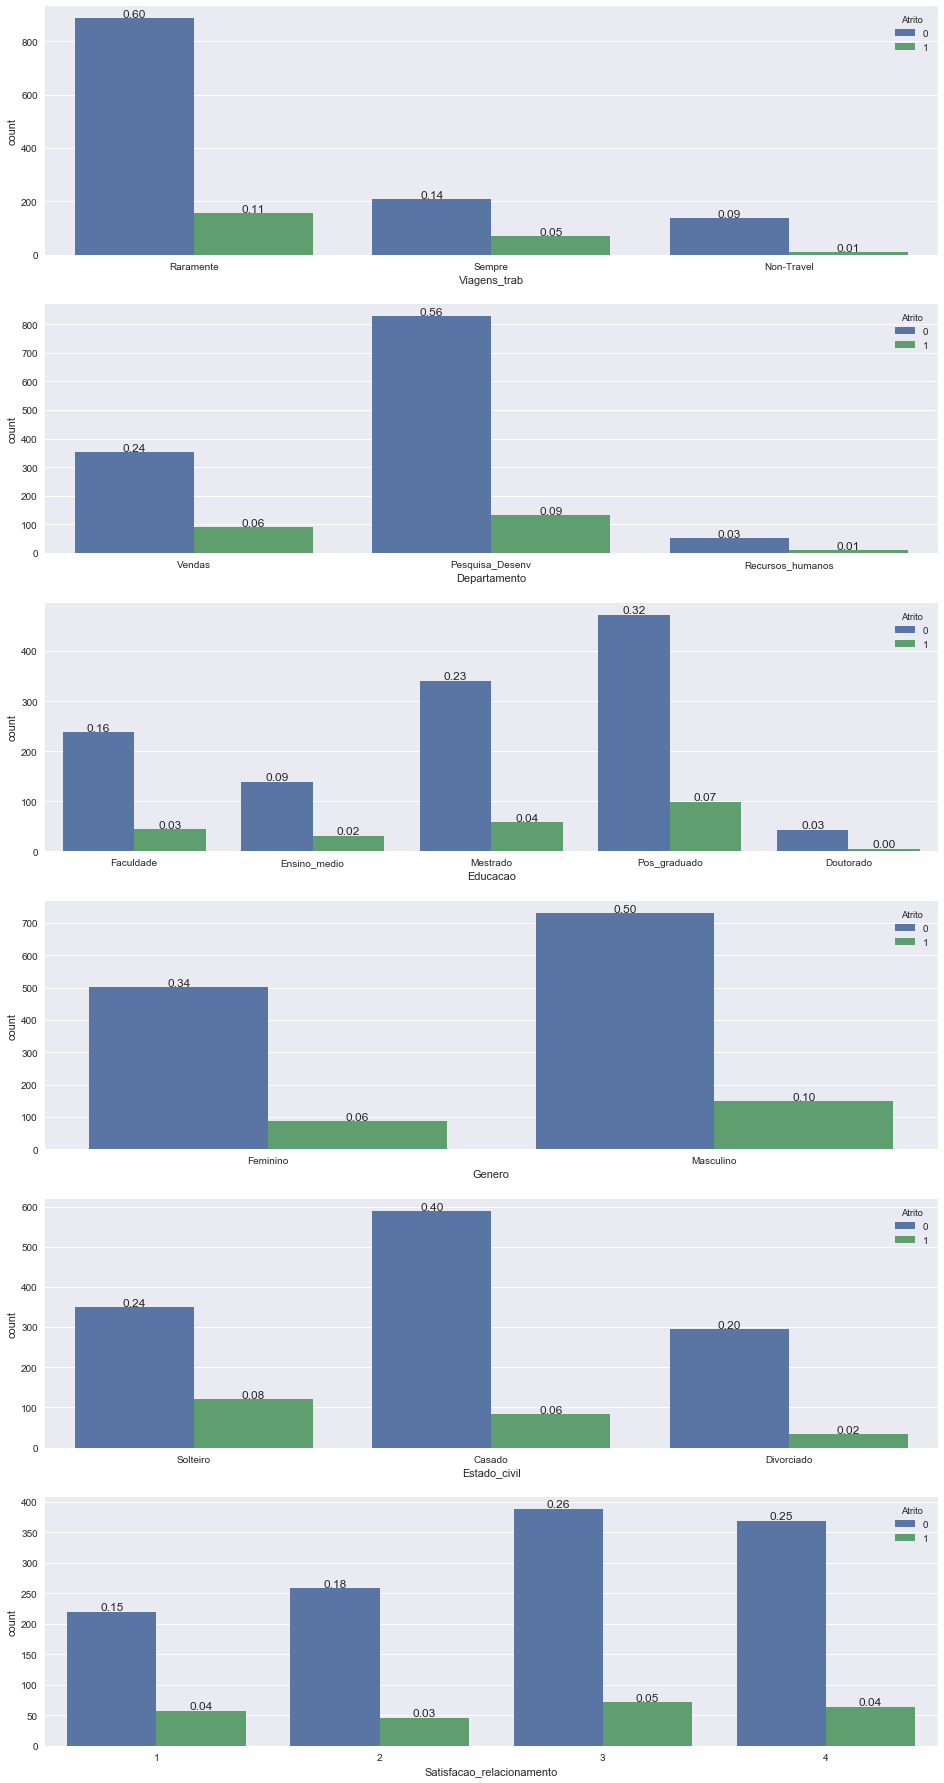

In [12]:
plt.figure(figsize=(16,32))
a = 0
sns.set(style="darkgrid")
for i in colunas:
    a +=1
    plt.subplot(6,1,a)
    #sns.countplot(rh[i])
    ax1 = sns.countplot(data=rh,x= i,hue="Atrito")
    if(a==8 or a== 7):
        plt.xticks( rotation=90)
    for b in ax1.patches:
        altura = b.get_height()
        ax1.text(b.get_x()+b.get_width()/2.,
                altura + 3,
                '{:1.2f}'.format(altura/contagem_total,0),
                ha="center",rotation=0) 

In [13]:
a = rh.pivot_table(values=["Renda_mensal", "Idade", "Dist_residencia", "Satisfacao_trabalho"
                           ], columns="Genero" ,index=["Atrito", "Estado_civil"])
a.head(10)

Dist_residencia                 Idade            Renda_mensal              Satisfacao_trabalho          
Genero                     Feminino  Masculino   Feminino  Masculino     Feminino    Masculino            Feminino Masculino
Atrito Estado_civil                                                                                                         
0      Casado              9.360996   9.126437  38.825726  37.557471  7323.132780  6725.071839            2.697095  2.778736
       Divorciado          8.407407   9.225806  38.194444  37.419355  7053.481481  7081.892473            2.518519  2.822581
       Solteiro            8.565789   8.257576  37.065789  36.196970  6513.703947  6315.540404            2.927632  2.863636
1      Casado             13.064516   9.981132  37.096774  34.603774  5865.193548  5379.622642            2.580645  2.471698
       Divorciado         10.111111  11.000000  32.555556  36.708333  3359.444444  4578.041667            2.666667  2.541667
       Solteiro            9.659574  10.643836  29.595745  33.095890  4317.255319  4446.315068            2.276596  2.493151

In [14]:
briguentos = rh[rh["Atrito"] == 1]

In [15]:
briguentos[['Idade','Dist_residencia', 'Satisfacao_ambiente', 'Envolvimento', 'Nivel_trabalho',
    'Satisfacao_trabalho', 'Renda_mensal','Hora_extra', 'Desempenho', 'Satisfacao_relacionamento', 
    'Total_anos_trabalhados', 'Anos_de_empresa', 'Anos_ultima_promocao', 'Anos_mesmo_gerente']].mean()

Idade                          33.607595
Dist_residencia                10.632911
Satisfacao_ambiente             2.464135
Envolvimento                    2.518987
Nivel_trabalho                  1.637131
Satisfacao_trabalho             2.468354
Renda_mensal                 4787.092827
Desempenho                      3.156118
Satisfacao_relacionamento       2.599156
Total_anos_trabalhados          8.244726
Anos_de_empresa                 5.130802
Anos_ultima_promocao            1.945148
Anos_mesmo_gerente              2.852321
dtype: float64

In [16]:
tranquilos = rh[rh["Atrito"] == 0]
tranquilos[['Idade','Dist_residencia', 'Satisfacao_ambiente', 'Envolvimento', 'Nivel_trabalho',
    'Satisfacao_trabalho', 'Renda_mensal','Hora_extra', 'Desempenho', 'Satisfacao_relacionamento', 
    'Total_anos_trabalhados', 'Anos_de_empresa', 'Anos_ultima_promocao', 'Anos_mesmo_gerente']].mean()

Idade                          37.561233
Dist_residencia                 8.915653
Satisfacao_ambiente             2.771290
Envolvimento                    2.770479
Nivel_trabalho                  2.145985
Satisfacao_trabalho             2.778589
Renda_mensal                 6832.739659
Desempenho                      3.153285
Satisfacao_relacionamento       2.733982
Total_anos_trabalhados         11.862936
Anos_de_empresa                 7.369019
Anos_ultima_promocao            2.234388
Anos_mesmo_gerente              4.367397
dtype: float64

In [164]:
# Importando o arquivo csv para identificar o melhor modelo
ml = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

In [165]:
ml.drop(['BusinessTravel', 'DailyRate', 'Education', 'EducationField', 
         'EmployeeCount', 'EmployeeNumber','JobRole', 'NumCompaniesWorked', 'Over18', 
         'PercentSalaryHike',  'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 
         'WorkLifeBalance', 'YearsInCurrentRole'], axis=1, inplace=True)

In [166]:
Y = ml.iloc[:,1].values

In [167]:
ml.drop("Attrition", axis=1, inplace=True)


In [168]:
X = ml.iloc[:,:].values

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pandas.tools.plotting import scatter_matrix

In [170]:
X[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
X[:, 4] = labelencoder_previsores.fit_transform(previsores[:, 4])
X[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
X[:, 12] = labelencoder_previsores.fit_transform(previsores[:, 12])
onehotencoder = OneHotEncoder(categorical_features = [1,3,5,6,7,8,9,13])
X = onehotencoder.fit_transform(X).toarray()


In [171]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [172]:
# Conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = cross_validation.train_test_split(X, Y, 
                                                                         test_size = 0.20, 
                                                                         random_state = 7)

In [173]:
import warnings
warnings.filterwarnings('ignore')

In [174]:
# Criando modelo de Machine Leanring a partir de cada algoritmo
# Métrica a acurácia. Quanto maior o valor, melhor.
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = len(X_treino), n_folds = 10, random_state = 7)
    cross_val_result = cross_validation.cross_val_score(modelo, X_treino, 
                                                        Y_treino, 
                                                        cv = kfold, 
                                                        scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

LR: 0.863965 (0.027297)
LDA: 0.846154 (0.031337)
KNN: 0.824808 (0.033135)
CART: 0.784130 (0.041803)
NB: 0.747465 (0.043211)
SVM: 0.835050 (0.037291)


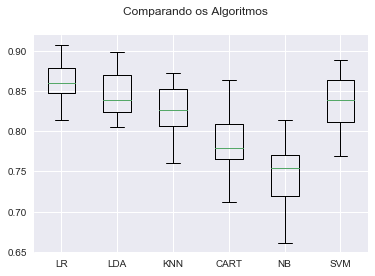

In [175]:
# De acordo com os resultados anteriores, o Regressão Logística apresentou o melhor valor de acurácia.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()